# Logistic Regression

1)  We consider a binary classification problem and implement logistic regression using ```sklearn```.

2) We consider the same binary classification problem as above and we code logistic regression model from scratch as a single neuron with batch gradient descent. 

3) We consider a multiclass classfication problem with logistic regression using ```sklearn```.

---

## 1) Binary logistic regression using sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
np.e

2.718281828459045

In [3]:
def sigmoid(z):
    return (1/(1+np.e**(-z)))

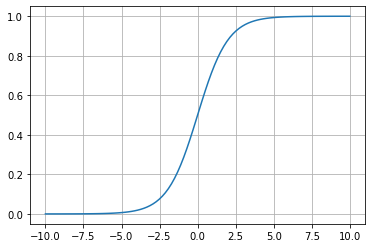

In [7]:
z = np.linspace(-10, 10, 100)

plt.plot(z, sigmoid(z))
plt.grid();

In [9]:
df = pd.read_csv('insurancedata.csv')
df.head()

,age,insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [10]:
df.shape

(27, 2)

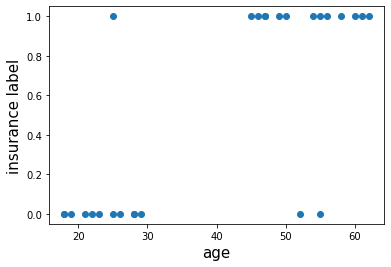

In [11]:
plt.scatter(df.age, df.insurance)
plt.xlabel('age', fontsize=15)
plt.ylabel('insurance label', fontsize=15);

In [12]:
X = df[['age']]
y = df['insurance']

log_reg = LogisticRegression()

log_reg.fit(X, y)

LogisticRegression()

In [13]:
log_reg.predict_proba([[65], [21]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.02781947, 0.97218053],
       [0.92860822, 0.07139178]])

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
log_reg.predict([[65],[21]])

array([1, 0], dtype=int64)

In [16]:
b = log_reg.intercept_
b

array([-5.48608377])

In [17]:
w = log_reg.coef_
w

array([[0.13907522]])

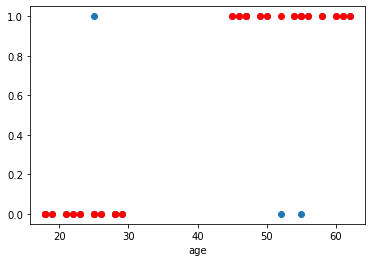

In [18]:
plt.scatter(X, y)

y_pred = log_reg.predict(X)

plt.scatter(X, y_pred, color = "red")

plt.xlabel('age');

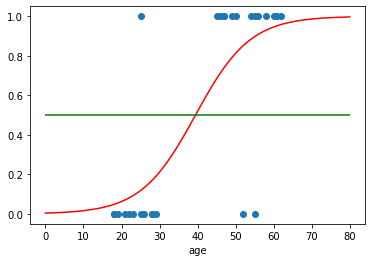

In [19]:
plt.scatter(X, y)

x_value = np.linspace(0, 80, 100)

def p(x, b, w):
    return 1/(1+ np.e**(-(w*x+b)))

plt.plot(x_value, p(x_value, b, w[0]), color="red")

plt.xlabel("age")

plt.hlines(xmin=0, xmax=80, y=0.5, color='green');

---

**Question:** What is the threshold age for making predictions?

---

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[11,  2],
       [ 1, 13]], dtype=int64)

In [21]:
(11+13)/(11+13+2+1)

0.8888888888888888

In [22]:
log_reg.score(X, y)

0.8888888888888888

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.87      0.93      0.90        14

    accuracy                           0.89        27
   macro avg       0.89      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27



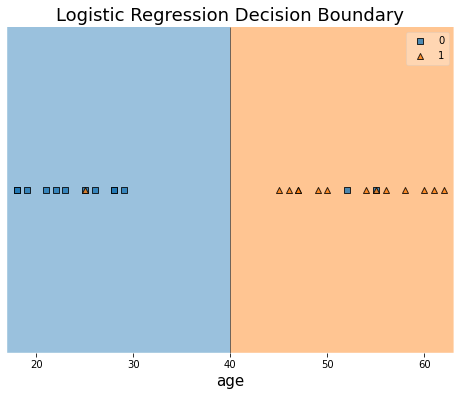

In [24]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X.to_numpy(), y.to_numpy(), clf = log_reg)
plt.title("Logistic Regression Decision Boundary", fontsize = 18)
plt.xlabel("age", fontsize = 15);

---

## 2) Binary logistic regression from scratch

---

Consider dataset $D = \{ (x^{(1)}, y^{(1)}), \ldots, (x^{(n)}, y^{(n)})\}$ where $x^{(i)} \in \mathbb R$ and $y^{(i)} \in 
\{0,1\}$.

Linear logistic regression model is given by $h(x) = \sigma(wx + b)$, where 
$$
    \sigma(z) = \frac{1}{1+e^{-z}}
$$
is the sigmoid function.

We want to find parameters $w$ and $b$ that minimize the binary cross entropy loss: 

$$
L(w, b; D) = - \frac{1}{n}\sum_{i=1}^n  \left( y^{(i)} \log \hat y^{(i)} + (1-y^{(i)}) \log (1-\hat y^{(i)})\right)
$$

Since $L(w, b; D)$ is a differentiable function of both $w$ and $b$, and it is also convex, we can try to solve this minimization problem by applying the gradient descent algorithm:

$$
w_{new} = w - \alpha \frac{\partial L}{\partial w}(w, b; D)
$$

$$
b_{new} = b - \alpha \frac{\partial L}{\partial b}(w, b; D)
$$

where $\alpha$ is a learning rate hyperparameter and the derivaties are given by 

$$
\frac{\partial L}{\partial w}(w, b; D) = \frac{1}{n}\sum_{i=1}^{n}\Big(\hat{y}^{(i)} - y^{(i)}\Big)x^{(i)}
$$

$$
\frac{\partial L}{\partial b}(w, b; D) = \frac{1}{n}\sum_{i=1}^{n}\Big(\hat{y}^{(i)} - y^{(i)}\Big)
$$

---

In [33]:
class MyLogReg(object):
    """
    A class used to represent a single artificial neuron modeling logistic regression. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    loss_function : function
        The loss/cost function used to measure model performance.

    w : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the fit method is called.

    errors : list
        A list containing the binary cross entropy error computed after each epoch 
        of batch gradient descent.

    Methods
    -------
    fit(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the batch gradient descent algorithm 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of a feature vector X and associated label y. 

    predict(self, X)
        Uses the weights and bias, the feature vector X, and the 
        activation_function to make a y_hat prediction on each data instance. 
    """
    
    def __init__(self, activation_function, loss_function):
        self.activation_function = activation_function
        self.loss_function = loss_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w = np.random.rand(1 + X.shape[1])
        self.errors = []
        n = X.shape[0]

        for _ in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0
            for xi, target in zip(X, y):    
                sum_1 += (self.predict(xi) - target)*xi
                sum_2 += (self.predict(xi) - target)
                errors +=self.loss_function(self.predict(xi), target)
            self.w[:-1] -= alpha*sum_1/n
            self.w[-1] -= alpha*sum_2/n
            self.errors.append(errors/n)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w[:-1]) + self.w[-1]
        return self.activation_function(preactivation)


    def plot_loss_function(self):
        fig, axs = plt.subplots(figsize = (8, 6))
        axs.plot(range(1, len(self.errors) + 1), 
                self.errors)
        axs.set_xlabel("Epochs", fontsize = 15)
        axs.set_ylabel("Binary cross entropy loss", fontsize = 15)
        axs.set_title("Loss Calculated During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize = (8, 6))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Decision Boundary", fontsize = 18)
        plt.xlabel("age", fontsize = 15)
        plt.show()

In [34]:
def binary_cross_entropy_loss(y_hat, y):
    return -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

In [35]:
X = df[['age']].to_numpy()
X

array([[22],
       [25],
       [47],
       [52],
       [46],
       [56],
       [55],
       [60],
       [62],
       [61],
       [18],
       [28],
       [28],
       [29],
       [49],
       [55],
       [25],
       [58],
       [19],
       [18],
       [21],
       [26],
       [47],
       [45],
       [50],
       [54],
       [23]], dtype=int64)

In [36]:
y = df['insurance'].to_numpy()
y

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0], dtype=int64)

In [39]:
model = MyLogReg(sigmoid, binary_cross_entropy_loss)

model.train(X, y, alpha = 0.005, epochs = 3500)

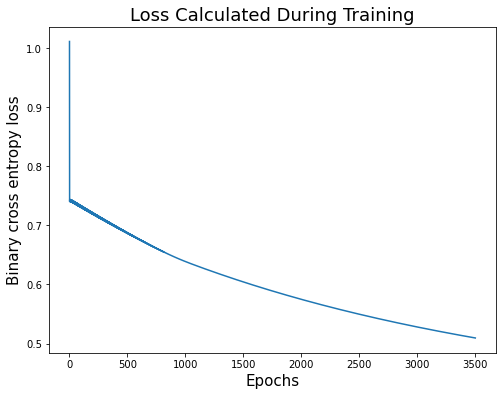

In [40]:
model.plot_loss_function();

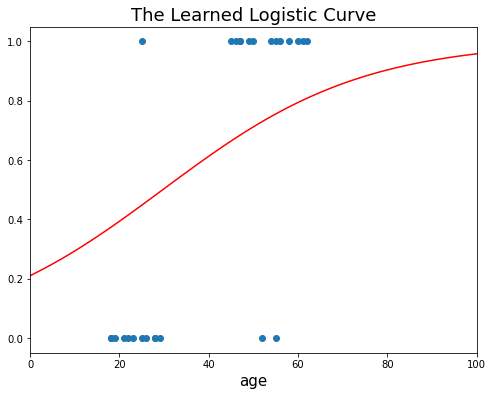

In [41]:
plt.figure(figsize = (8, 6))
plt.xlim((0, 100))

plt.scatter(df.age, df.insurance)

domain = np.linspace(0, 100, 100)
plt.plot(domain, model.predict(domain.reshape(-1, 1)), color="red")
plt.xlabel("age", fontsize = 15)
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [42]:
model.predict([[65]])

array([0.82833988])

In [43]:
print(np.rint(model.predict(X)) == y)

# round the predicted probability to the nearest interger to see what the predicted label is

[ True  True  True False  True  True False  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True]


In [44]:
predicted_labels = (np.rint(model.predict(X)) == y).astype(int)
print(f"Accuracy = {sum(predicted_labels)/ len(y)}")

Accuracy = 0.8888888888888888


In [45]:
predicted_labels

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

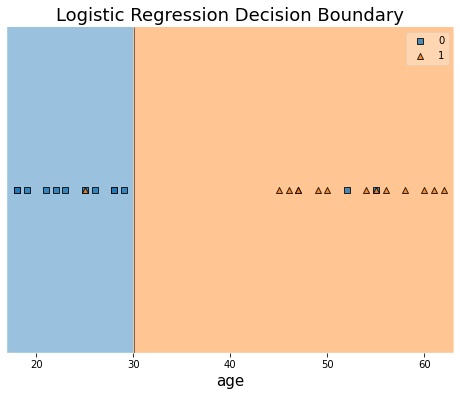

In [46]:
model.plot_decision_boundary(X, y)
plt.show()

---

**Note:** The decision boundary is different from the one found using sklearn because logistic regression class in sklearn usespecially regularization and minimizing techniques different from the simple batch gradient descent we defined. 

---

## 3) Multiclass logistic regression using sklearn

In [47]:
from sklearn.datasets import load_digits

digits = load_digits()

In [48]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [49]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [50]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [51]:
digits.data[25]

array([ 0.,  0., 12.,  8.,  8.,  7.,  0.,  0.,  0.,  3., 16., 16., 11.,
        7.,  0.,  0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
       14.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15., 16.,  9.,  0.,  0.,
        0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  4.,  8.,
       16.,  4.,  0.,  0.,  0.,  0., 11., 14.,  9.,  0.,  0.,  0.])

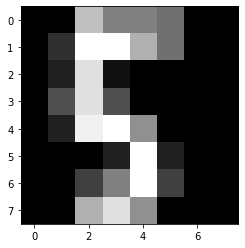

In [52]:
plt.gray() 
plt.imshow(digits.images[25]);

In [53]:
digits.target[25]

5

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [55]:
len(X_train)

1437

In [56]:
len(X_test)

360

In [57]:
model = LogisticRegression(max_iter=10_000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [58]:
model.score(X_train, y_train)

1.0

In [59]:
model.score(X_test, y_test)

0.9611111111111111

In [60]:
y_predicted = model.predict(X_test)

In [61]:
y_predicted

array([2, 3, 9, 6, 0, 2, 7, 0, 2, 6, 5, 8, 0, 6, 9, 1, 7, 0, 7, 1, 4, 7,
       2, 4, 8, 1, 4, 6, 7, 1, 9, 1, 9, 7, 2, 0, 7, 3, 6, 7, 8, 8, 4, 0,
       9, 9, 4, 3, 1, 2, 6, 2, 1, 8, 0, 9, 2, 3, 9, 7, 5, 6, 8, 1, 2, 0,
       8, 2, 5, 0, 2, 1, 4, 1, 9, 1, 2, 8, 6, 0, 0, 5, 9, 3, 4, 1, 0, 5,
       8, 9, 8, 3, 0, 9, 5, 0, 9, 1, 1, 0, 5, 2, 5, 1, 2, 9, 6, 7, 2, 7,
       5, 6, 8, 1, 1, 5, 2, 8, 9, 7, 1, 8, 2, 6, 0, 1, 1, 6, 0, 0, 4, 2,
       7, 7, 4, 6, 0, 5, 7, 2, 6, 4, 6, 9, 4, 7, 8, 1, 1, 8, 0, 4, 0, 3,
       6, 6, 9, 4, 2, 2, 1, 4, 0, 4, 7, 8, 3, 4, 0, 6, 7, 1, 8, 3, 3, 5,
       3, 3, 4, 8, 9, 7, 7, 5, 6, 9, 6, 6, 9, 6, 5, 7, 3, 8, 6, 6, 7, 5,
       8, 0, 0, 6, 7, 8, 2, 6, 4, 1, 5, 8, 8, 4, 4, 9, 0, 9, 8, 1, 6, 1,
       7, 3, 0, 8, 0, 8, 4, 8, 7, 1, 0, 2, 9, 5, 8, 3, 0, 9, 5, 4, 1, 6,
       3, 9, 9, 4, 6, 3, 8, 9, 4, 4, 4, 9, 8, 2, 7, 6, 8, 2, 1, 6, 5, 4,
       2, 1, 2, 2, 9, 6, 7, 2, 9, 7, 2, 7, 5, 4, 8, 3, 5, 6, 4, 9, 2, 8,
       8, 6, 4, 5, 0, 8, 9, 8, 6, 2, 9, 2, 8, 2, 8,

In [62]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 34,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 35,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3, 36]], dtype=int64)

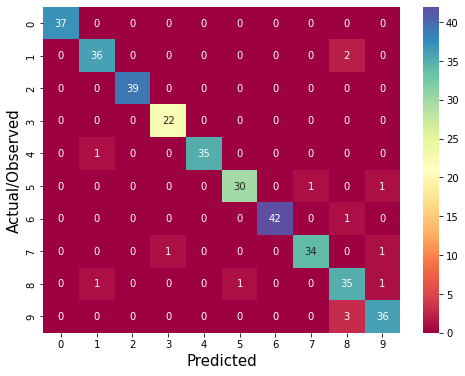

In [63]:
plt.figure(figsize = (8,6))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [64]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.95      0.95      0.95        38
           2       1.00      1.00      1.00        39
           3       0.96      1.00      0.98        22
           4       1.00      0.97      0.99        36
           5       0.97      0.94      0.95        32
           6       1.00      0.98      0.99        43
           7       0.97      0.94      0.96        36
           8       0.85      0.92      0.89        38
           9       0.92      0.92      0.92        39

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

